# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying plots inline in Jupyter Notebook
%matplotlib inline


# LOAD THE DATASET

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# UNDERSTAND THE DATA

In [3]:
# Check the shape of the data
print(df.shape)

# Get a concise summary of the dataset
df.info()

# Display basic statistical details
df.describe()


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# HANDLING MISSING VALUES

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [13]:
# Fill missing values in 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
# Fill missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
# Drop the 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [16]:
# Drop rows with any remaining missing values
df = df.dropna()

In [17]:
# Fill remaining missing values with 0
df = df.fillna(0)

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values[missing_values > 0])

# Fill missing values in 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# Drop rows with any remaining missing values (optional)
df = df.dropna()

# Check for missing values after handling
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after[missing_values_after > 0])


Missing values before handling:
 Series([], dtype: int64)
Missing values after handling:
 Series([], dtype: int64)


# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

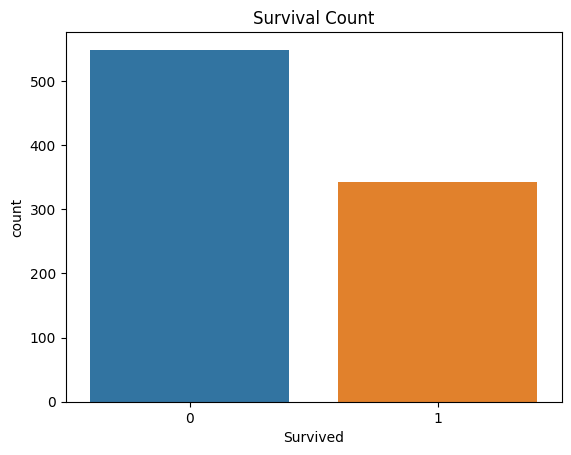

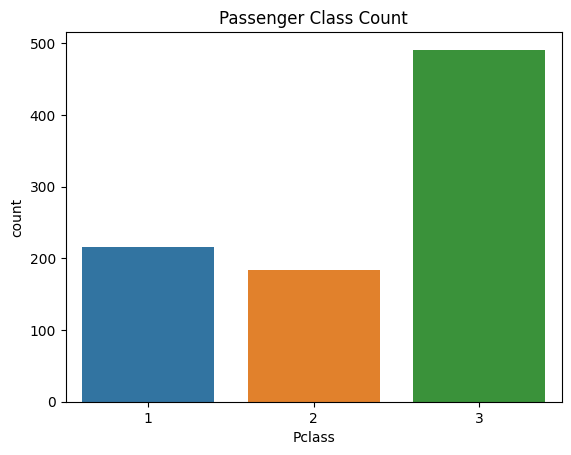

In [19]:
# Plot distribution of 'Survived' column
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Plot distribution of 'Pclass'
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Count")
plt.show()

# Bivariate Analysis

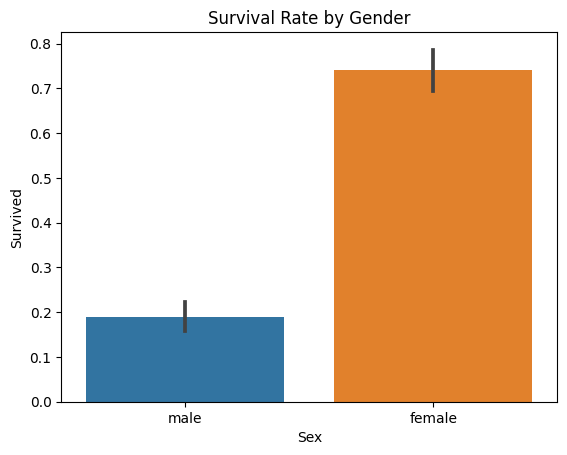

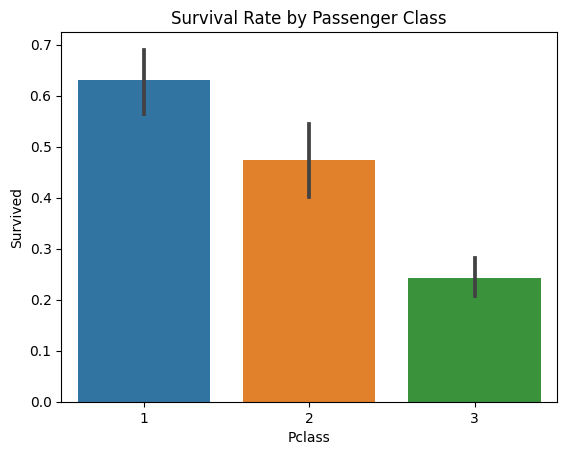

In [20]:
# Survival rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


# Correlation Analysis

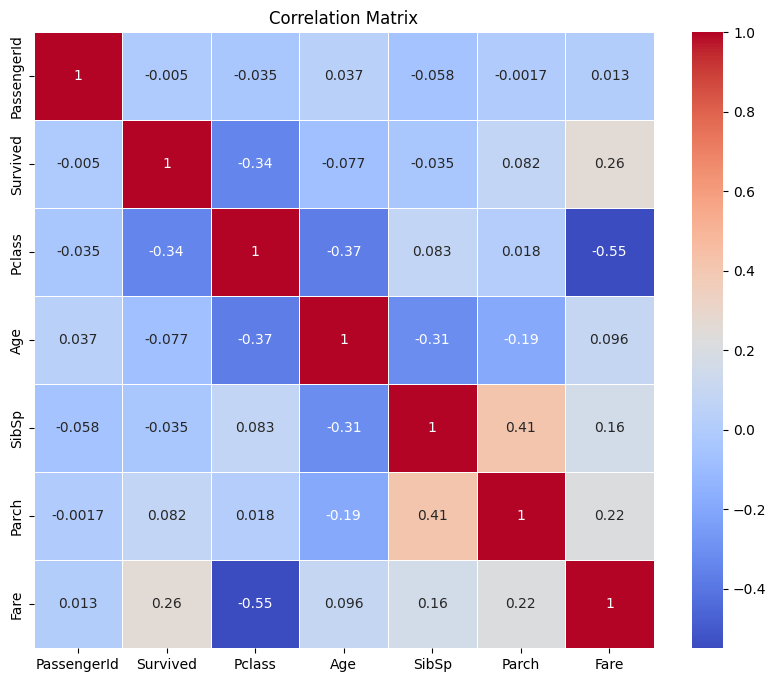

In [4]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# VISUALIZATIONS

#  Count Plot of Survival Status

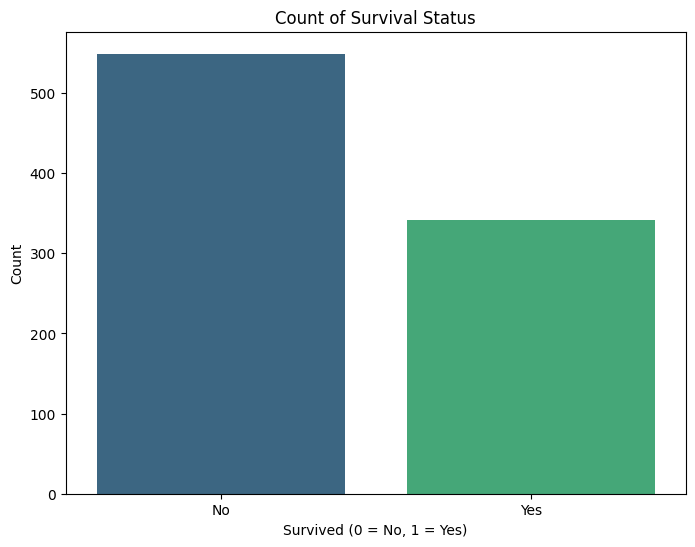

In [8]:
# Count Plot of Survival Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Count of Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Bar Plot of Survival by Gender

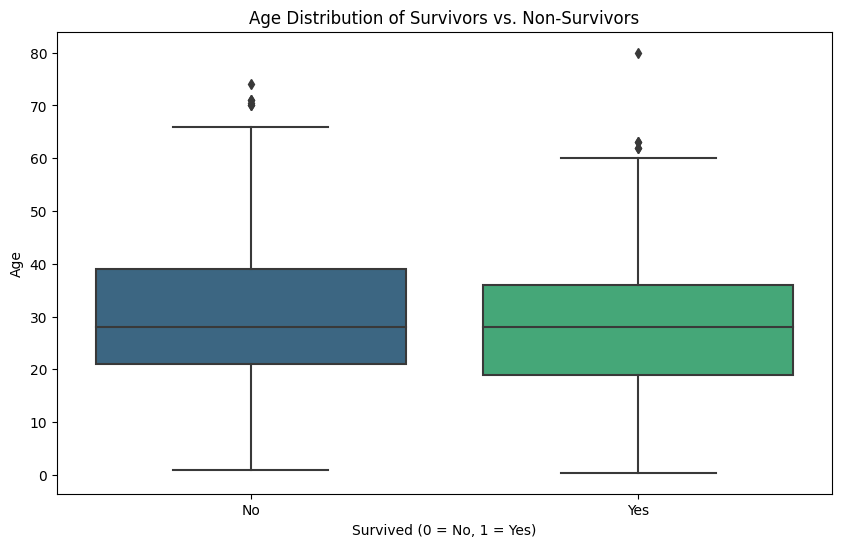

In [9]:
# Box Plot of Age vs. Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='viridis')
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


#  Count Plot of Survival by Passenger Class

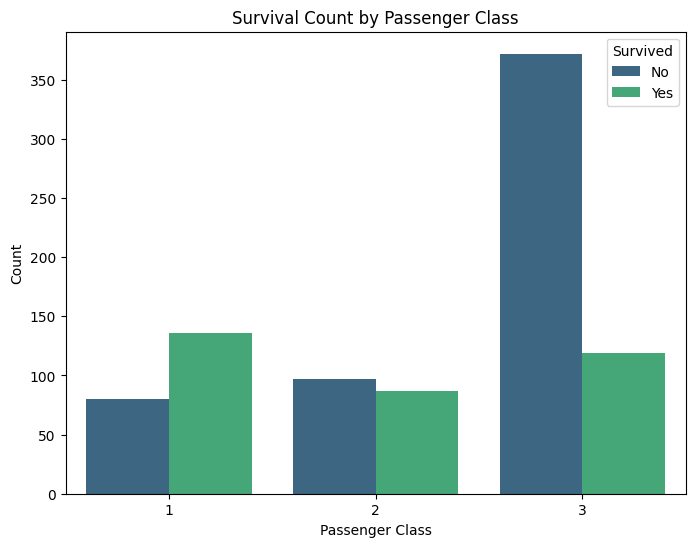

In [11]:
# Count Plot of Survival by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


#  Violin Plot of Fare vs. Survival

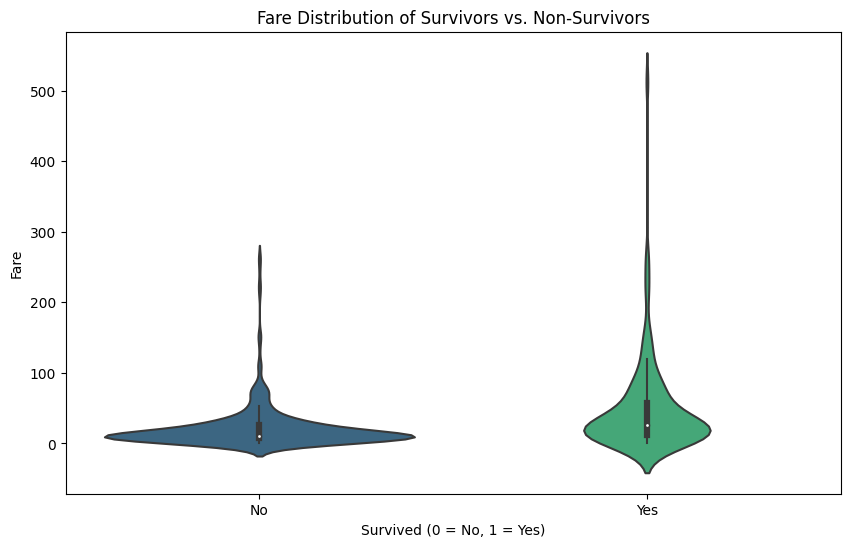

In [12]:
# Violin Plot of Fare vs. Survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=df, palette='viridis')
plt.title('Fare Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


# Pair Plot of Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

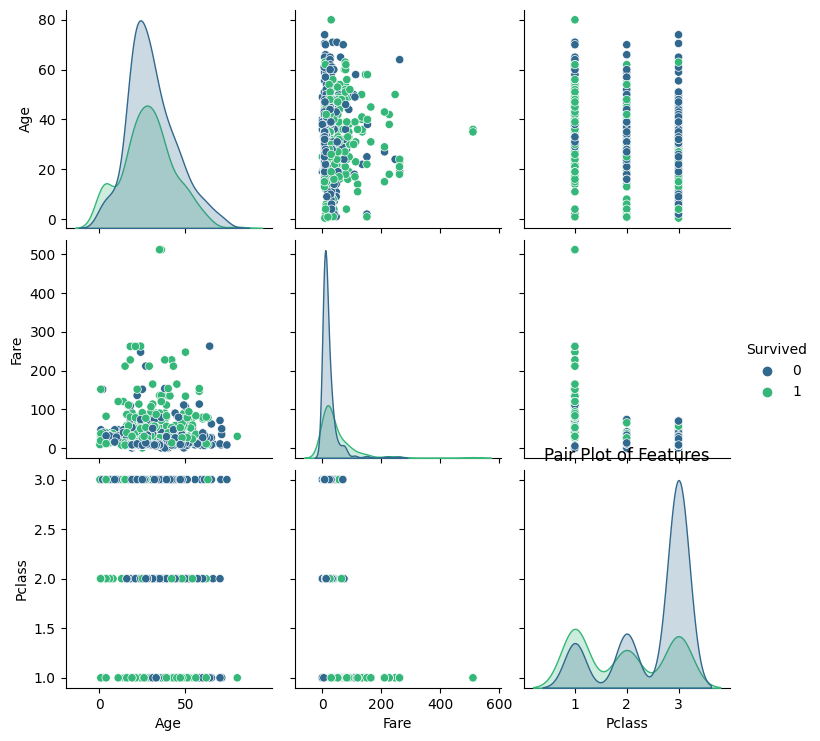

In [14]:
# Pair Plot of Features
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass'], palette='viridis')
plt.title('Pair Plot of Features')
plt.show()
